In [2]:
pip install xgboost

                                              0.0/99.7 MB ? eta -:--:--
                                              0.1/99.7 MB ? eta -:--:--
                                              0.1/99.7 MB 1.4 MB/s eta 0:01:09
                                              0.1/99.7 MB 1.4 MB/s eta 0:01:11
                                             0.2/99.7 MB 919.0 kB/s eta 0:01:49
                                             0.2/99.7 MB 807.1 kB/s eta 0:02:04
                                             0.2/99.7 MB 807.1 kB/s eta 0:02:04
                                             0.2/99.7 MB 654.4 kB/s eta 0:02:33
                                             0.2/99.7 MB 565.6 kB/s eta 0:02:57
                                             0.2/99.7 MB 565.6 kB/s eta 0:02:57
                                             0.2/99.7 MB 529.7 kB/s eta 0:03:08
                                             0.2/99.7 MB 497.3 kB/s eta 0:03:21
                                             0.2/99.7 MB 4


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install yellowbrick

                                              0.0/282.6 kB ? eta -:--:--
     -----------                             81.9/282.6 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 282.6/282.6 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
pip install cufflinks

  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached ipywidgets-8.1.1-py3-none-any.whl (139 kB)
  Using cached jupyterlab_widgets-3.0.9-py3-none-any.whl (214 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Python311\\share'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.impute import SimpleImputer
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer

import missingno as msno

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.7f' % x)

ModuleNotFoundError: No module named 'cufflinks'

In [20]:
# For checking missing values and missing percent

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [21]:
# To view summary information about the column

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [22]:
df = pd.read_csv("F:\Ml\Dataset\healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [25]:
df.describe(include=object).T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [26]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [27]:
df.duplicated().value_counts()

False    5110
Name: count, dtype: int64

In [28]:
missing (df)

,Missing_Number,Missing_Percent
bmi,201,0.039335
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000


In [ ]:
df.drop('id', axis=1, inplace=True)

In [32]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [34]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)

In [35]:
X = df.drop('stroke',axis=1)
y = df['stroke']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [37]:
X_train.bmi.value_counts(dropna=False)

bmi
NaN     136
27.6     32
23.4     31
26.7     29
24.8     27
       ... 
61.2      1
56.0      1
55.9      1
50.8      1
50.3      1
Name: count, Length: 395, dtype: int64

In [38]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median")

X_train['bmi'] = imputer.fit_transform(X_train['bmi'].values.reshape(-1,1))[:,0]

In [39]:
X_test['bmi'] = imputer.fit_transform(X_test['bmi'].values.reshape(-1,1))[:,0]

In [40]:
print(X_train.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


In [41]:
print(X_test.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


# Implement KNN and Evaluate

In [42]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [47]:
# Define which columns are categorical
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Initialize encoders for one-hot encoding
encoder = OneHotEncoder(sparse=False, drop='first')

# Apply one-hot encoding to the categorical columns
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Initialize a MinMaxScaler for numerical columns
scaler = MinMaxScaler()

# Define which columns are numerical (excluding the target)
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

# Scale the numerical columns
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Combine the one-hot encoded categorical and scaled numerical data
import numpy as np
X_train_processed = np.hstack((X_train_encoded, X_train_scaled))
X_test_processed = np.hstack((X_test_encoded, X_test_scaled))

c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [48]:
knn = KNeighborsClassifier()

In [52]:
knn.fit(X_train_processed, y_train)

KNeighborsClassifier()

In [53]:
knn_pred = knn.predict(X_test_processed)

In [54]:
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[1442    2]
 [  86    3]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.60      0.03      0.06        89

    accuracy                           0.94      1533
   macro avg       0.77      0.52      0.52      1533
weighted avg       0.92      0.94      0.92      1533



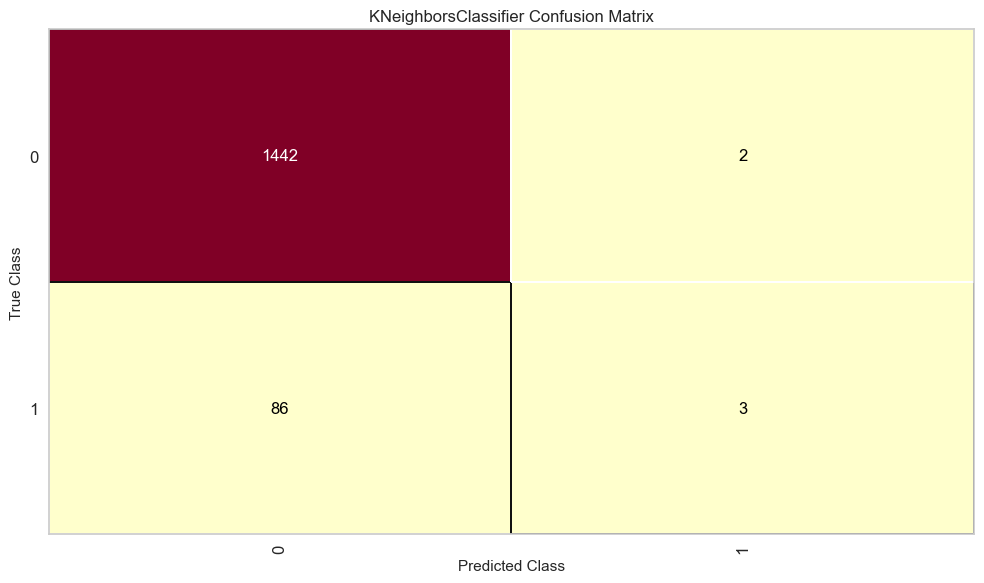

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [55]:
plt.figure(figsize=(10, 6))
cm = ConfusionMatrix(knn)
cm.fit(X_train_processed, y_train)
cm.score(X_test_processed, y_test)
cm.show()

### Elbow Method for Choosing Reasonable K Values


In [61]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_processed,y_train)
    pred_i = knn.predict(X_test_processed)
    error_rate.append(1 - recall_score(y_test, pred_i))

Text(0, 0.5, 'Error Rate')

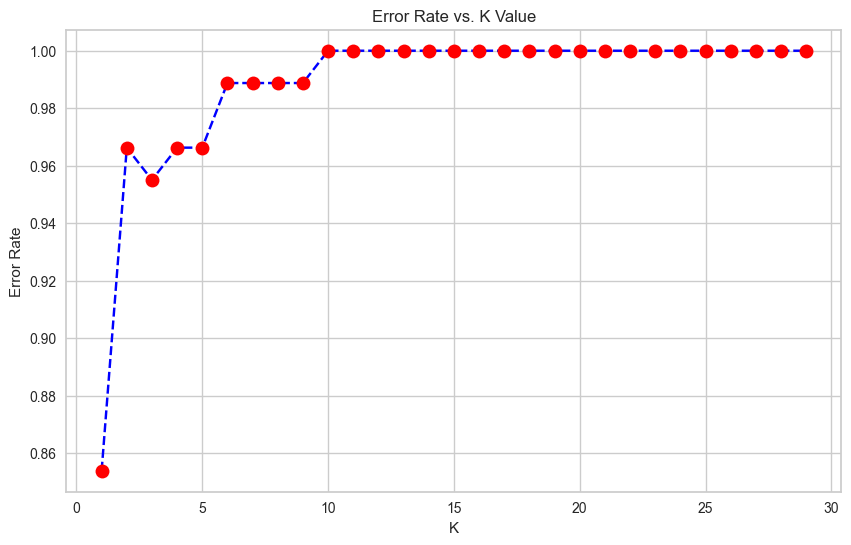

In [62]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [64]:
# FIRST A QUICK COMPARISON TO OUR DEFAULT VALUE K=5
knn = KNeighborsClassifier()

knn.fit(X_train_processed,y_train)
pred = knn.predict(X_test_processed)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=5


[[1442    2]
 [  86    3]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.60      0.03      0.06        89

    accuracy                           0.94      1533
   macro avg       0.77      0.52      0.52      1533
weighted avg       0.92      0.94      0.92      1533



In [65]:
# WITH K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_processed,y_train)
pred = knn.predict(X_test_processed)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=1


[[1383   61]
 [  76   13]]


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1444
           1       0.18      0.15      0.16        89

    accuracy                           0.91      1533
   macro avg       0.56      0.55      0.56      1533
weighted avg       0.90      0.91      0.91      1533



In [66]:
# WITH K=2
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train_processed,y_train)
pred = knn.predict(X_test_processed)

print('WITH K=2')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=2


[[1439    5]
 [  86    3]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.38      0.03      0.06        89

    accuracy                           0.94      1533
   macro avg       0.66      0.52      0.52      1533
weighted avg       0.91      0.94      0.92      1533



In [67]:
# WITH K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_processed,y_train)
pred = knn.predict(X_test_processed)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=3


[[1427   17]
 [  85    4]]


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1444
           1       0.19      0.04      0.07        89

    accuracy                           0.93      1533
   macro avg       0.57      0.52      0.52      1533
weighted avg       0.90      0.93      0.91      1533



In [68]:
# WITH K=4
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train_processed,y_train)
pred = knn.predict(X_test_processed)

print('WITH K=4')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=4


[[1443    1]
 [  86    3]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.75      0.03      0.06        89

    accuracy                           0.94      1533
   macro avg       0.85      0.52      0.52      1533
weighted avg       0.93      0.94      0.92      1533



In [69]:
model = KNeighborsClassifier(n_neighbors=1)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.005497,0.051862,0.921788,0.125000,0.1250,0.125000
2,0.008976,0.060367,0.918994,0.066667,0.0625,0.064516
3,0.004986,0.045877,0.916201,0.062500,0.0625,0.062500
4,0.002992,0.030436,0.946927,0.200000,0.0625,0.095238
5,0.002990,0.028925,0.918994,0.157895,0.1875,0.171429
6,0.002991,0.028922,0.921788,0.071429,0.0625,0.066667
7,0.003010,0.027493,0.913165,0.058824,0.0625,0.060606
8,0.002984,0.028943,0.927171,0.083333,0.0625,0.071429
9,0.002974,0.030914,0.927171,0.142857,0.1250,0.133333
10,0.003990,0.027475,0.927171,0.187500,0.1875,0.187500


In [70]:
df_scores.mean()[2:]

test_accuracy     0.923937
test_precision    0.115600
test_recall       0.100000
test_f1           0.103822
dtype: float64

### Gridsearch Method for Choosing Optimal K Values

In [72]:
knn_grid = KNeighborsClassifier()

In [73]:
k_values= range(1,30)

In [74]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [75]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'recall')

In [76]:
knn_grid_model.fit(X_train_processed, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [77]:
knn_grid_model.best_params_

{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}

In [78]:
# NOW WITH K=1
knn = KNeighborsClassifier(n_neighbors=1, p=2, weights='uniform')

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=1


[[1378   66]
 [  79   10]]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1444
           1       0.13      0.11      0.12        89

    accuracy                           0.91      1533
   macro avg       0.54      0.53      0.54      1533
weighted avg       0.90      0.91      0.90      1533



- Our results with the KNN model for this dataset are not very good.

- Although we did cross validation and found the most suitable parameters with GridSearch, we could not achieve the desired improvement in our results.